In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# Download the dataset from Kagglea# Download the dataset from Kaggle
!kaggle datasets download -d dishanbhandari/dataset-1000

Dataset URL: https://www.kaggle.com/datasets/dishanbhandari/dataset-1000
License(s): unknown
 94% 329M/350M [00:02<00:00, 171MB/s]
100% 350M/350M [00:02<00:00, 166MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dataset-1000.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D,Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/split dataset/train'
valid_dir = '/content/split dataset/val'
test_dir = '/content/split dataset/test'

# Parameters
batch_size = 16
img_height = 224
img_width = 224
epochs = 15
num_classes = 2  # Adjust based on your dataset

# Data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 28014 images belonging to 2 classes.
Found 6002 images belonging to 2 classes.
Found 6005 images belonging to 2 classes.


In [7]:
# Print the class indices
print("Class indices:", train_generator.class_indices)

Class indices: {'Fake': 0, 'Real': 1}


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

input_shape = (224, 224, 3)
# Define the model architecture
model = Sequential([
    Input(shape=input_shape),

    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same'),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same'),

    # Global Average Pooling Layer
    GlobalAveragePooling2D(),

    # Dense Layers
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Fit the model with the new settings
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {accuracy*100:.2f}%')

Epoch 1/15
1751/1751 [==============================] - 686s 391ms/step - loss: 1.1961 - accuracy: 0.7204 - val_loss: 0.6319 - val_accuracy: 0.7857 - lr: 1.0000e-04
Epoch 2/15
1751/1751 [==============================] - 684s 390ms/step - loss: 0.5786 - accuracy: 0.7845 - val_loss: 0.5251 - val_accuracy: 0.8172 - lr: 1.0000e-04
Epoch 3/15
1751/1751 [==============================] - 687s 392ms/step - loss: 0.5201 - accuracy: 0.8058 - val_loss: 0.4761 - val_accuracy: 0.8367 - lr: 1.0000e-04
Epoch 4/15
1751/1751 [==============================] - 686s 391ms/step - loss: 0.4894 - accuracy: 0.8263 - val_loss: 0.4520 - val_accuracy: 0.8500 - lr: 1.0000e-04
Epoch 5/15
1751/1751 [==============================] - 686s 392ms/step - loss: 0.4742 - accuracy: 0.8342 - val_loss: 0.4367 - val_accuracy: 0.8525 - lr: 1.0000e-04
Epoch 6/15
1751/1751 [==============================] - 688s 393ms/step - loss: 0.4611 - accuracy: 0.8439 - val_loss: 0.4391 - val_accuracy: 0.8590 - lr: 1.0000e-04
Epoch 7/15

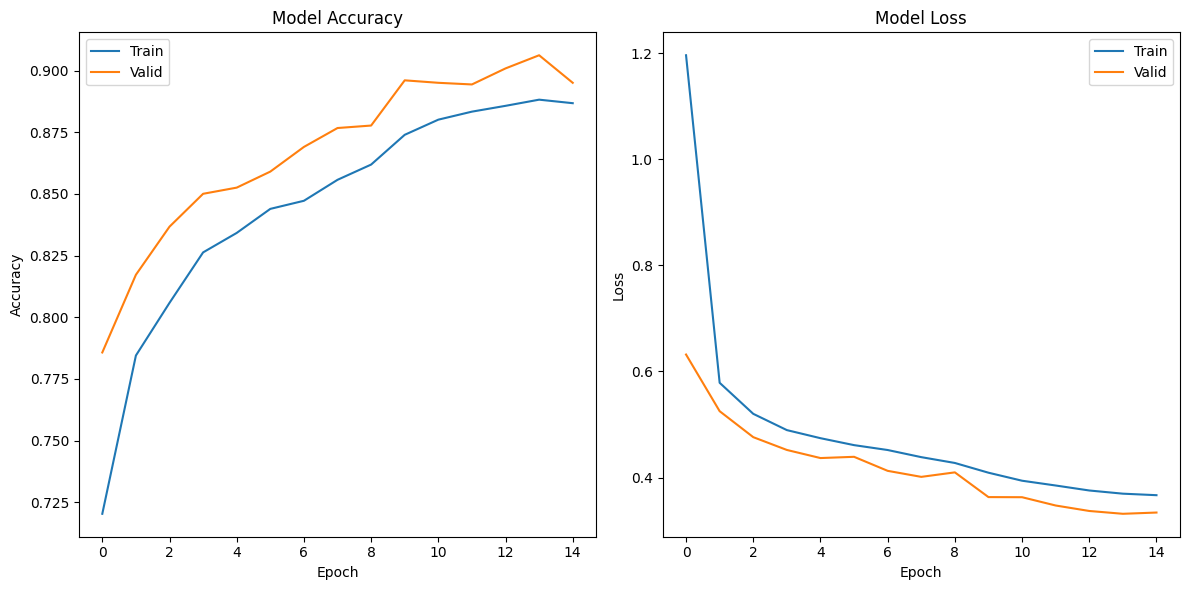

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'], loc='upper right')

plt.tight_layout()
plt.show()

376/376 [==============================] - 24s 64ms/step


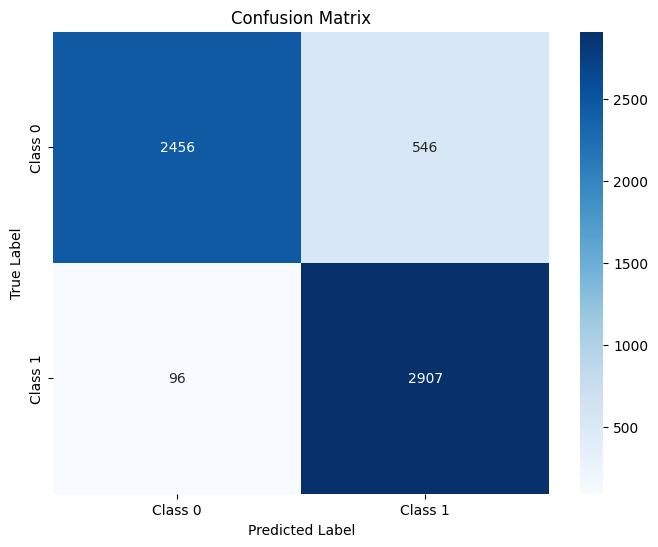

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the true labels from the test generator
true_labels = test_generator.classes

# Get predictions
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.round(predictions).astype(int).flatten()  # Since it's binary classification

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/amodel/bestmodel.keras')

In [ ]:
model.export('/content/drive/MyDrive/amodel/my_model')


Saved artifact at '/content/drive/MyDrive/amodel/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137812564198848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137812564202896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137812568009088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137814323817888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137812585024672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137812568011904: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [14]:

# Or save the model in HDF5 format
model.save('/content/drive/MyDrive/amodel/my_seq_model1.h5')

In [ ]:
#verifying the model
import os

# List the contents of the saved model directory
os.listdir('/content/drive/MyDrive/amodel/my_model')

['variables', 'assets', 'saved_model.pb', 'fingerprint.pb']

In [16]:

loaded_model = load_model('/content/drive/MyDrive/amodel/my_seq_model1.h5')


In [17]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 global_average_pooling2d_2  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 256)               16640     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                      

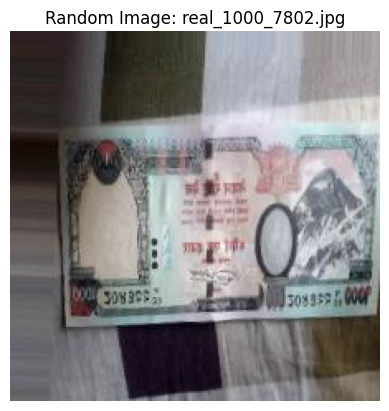

1/1 [==============================] - 0s 24ms/step
Prediction: Real


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the directory path
image_dir = '/content/split dataset/val'  # Adjust the path to your image directory

# List all files in the directory
all_files = []
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(('.jpg')):
            all_files.append(os.path.join(root, file))

# Select a random file
random_file = random.choice(all_files)

# Open and display the image
image = Image.open(random_file)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title(f'Random Image: {os.path.basename(random_file)}')
plt.show()

# Preprocess the image
image = image.resize((224, 224))  # Resize to (224, 224)
image_array = np.array(image)  # Convert to NumPy array
image_array = image_array / 255.0  # Rescale pixel values to [0, 1]

# Ensure the image has 3 channels
if image_array.shape[-1] == 1:
    image_array = np.repeat(image_array, 3, axis=-1)
elif image_array.shape[-1] == 4:
    image_array = image_array[..., :3]

# Reshape to (1, 224, 224, 3)
image_array = image_array.reshape((1, 224, 224, 3))

# Predict using the model
pred = model.predict(image_array)
pred = pred > 0.5  # Convert probabilities to binary class

# Display the prediction result
if pred == 0:
    print("Prediction: Fake")
else:
    print("Prediction: Real")